In [1]:
print("What if you can achieve a better result!")

What if you can achieve a better result!


This file will generate HbO, HbR and HbT using raw data of 695 and 830nm

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
def read_hb_from_file(example_path): # Open the file and read through the first few lines to find where the data starts
    with open(example_path, 'r') as file:
        lines = file.readlines()
        data_start_line = None
        for i, line in enumerate(lines):
            if 'Data' in line:  # This should match the unique identifier of the data section
                data_start_line = i + 1
                # print(lines[data_start_line])
                break

    if data_start_line is not None:

        # Read the data section, skipping the lines of the metadata
        data = pd.read_csv(example_path, skiprows=data_start_line)

        # Now you have metadata and data as separate DataFrames
        # print(data)
    else:
        print("Data section not found.")
        
    np_data = data.to_numpy()
    ch_data = np_data[:, 1:1+52*2]

    return ch_data

In [60]:
print(np.min(light_700))

10.62591553


In [70]:
import numpy as np

# Create a simple array that should not raise any issues
test_array = light_700[:,0]

def do_log(data):
    # Attempt to take the logarithm
    try:
        result = np.log(data)
        print(result)
    except TypeError as e:
        print(f"An error occurred: {e}")
        
    return result

[1.98791504,
 2.01171875,
 1.99417114,
 1.93481445,
 1.89071655,
 2.03704834,
 1.9392395,
 2.15713501,
 2.55996704,
 1.90368652,
 2.05368042,
 2.11181641,
 2.02026367,
 2.03048706,
 2.07473755,
 1.96594238,
 2.00759888,
 1.91604614,
 2.32833862,
 1.75231934,
 1.53442383,
 1.92047119,
 1.39709473,
 2.03613281,
 0.64544678,
 2.03186035,
 2.00454712,
 1.98226929,
 1.92672729,
 1.71218872,
 1.55334473,
 2.03308105,
 2.01004028,
 2.01889038,
 2.04742432,
 2.06207275,
 2.02865601,
 2.06680298,
 2.08618164,
 2.14675903,
 1.13128662,
 1.71279907,
 2.01004028,
 1.91726685,
 2.06008911,
 2.00866699,
 2.04483032,
 1.94717407,
 1.80740356,
 1.83883667,
 1.61483765,
 1.44470215,
 1.99996948,
 1.980896,
 1.98974609,
 1.93756104,
 1.89727783,
 2.02392578,
 1.92520142,
 2.21786499,
 2.46353149,
 1.88400269,
 2.0501709,
 2.11380005,
 2.06466675,
 2.06802368,
 2.07687378,
 1.96884155,
 2.00500488,
 1.91757202,
 2.30941772,
 1.75247192,
 1.42501831,
 1.99569702,
 1.38412476,
 2.01690674,
 0.66070557,
 2.

In [98]:
import numpy as np

# Define a square matrix
A = np.array([[1, 2], [3, 4]])

# Calculate its inverse
A_inv = np.linalg.inv(A)

print(A_inv)

[[-2.   1. ]
 [ 1.5 -0.5]]


/var/folders/dj/c5r3qbs52hg_qgrqgmmp61_m0000gn/T/ipykernel_13572/2907206340.py:17: RuntimeWarning: invalid value encountered in log10
  delta_700 = -np.log10(light_700/light_700_baseline)


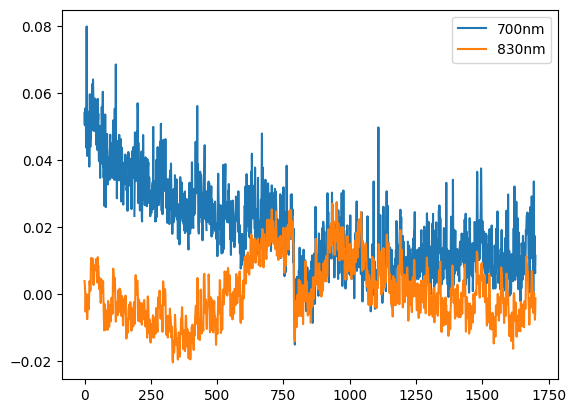

In [122]:
# Extinction coefficients for HbO and HbR at the two wavelengths
# Replace these with the actual values


# Matrix of extinction coefficients


# Inverse the matrix of extinction coefficients

ind_file = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/RawData/Baseline_fnirs/Controls/MES/CT020 VFT_MES_Probe1.csv'

data = read_hb_from_file(ind_file)

data = np.nan_to_num(data, 0)
light_700 = data[:,0::2].tolist()
light_700_baseline = np.mean(light_700, (0,1))
delta_700 = -np.log10(light_700/light_700_baseline)


light_830 = data[:,1::2].tolist()
light_830_baseline = np.mean(light_830, (0,1))
delta_830 = -np.log10(light_830/light_830_baseline + 1e-6)

plt.plot(np.mean(delta_700, 1), label ='700nm')
plt.plot(np.mean(delta_830, 1), label ='830nm')
plt.legend()




In [118]:
print(np.max(data))
print(np.min(data))


3.08563232
-1.88552856


3.08563232


(2, 1701)


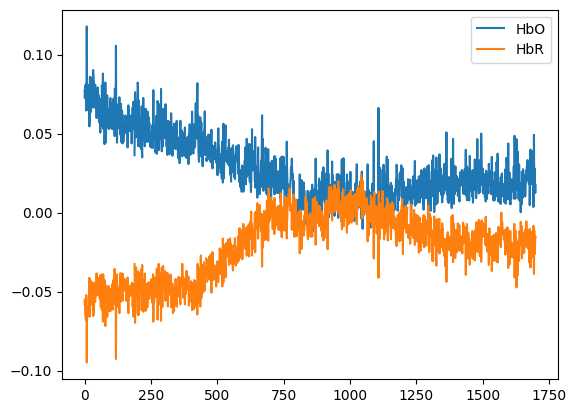

In [124]:

e_HbO_704 = 2
e_HbR_704 = 0.4
e_HbO_8279 = 0.8
e_HbR_8279 = 1
E = np.array([[e_HbO_704, e_HbR_704],
              [e_HbO_8279, e_HbR_8279]])
E_inv = np.linalg.inv(E)


ch_low_intensity = np.mean(delta_700, 1)

ch_high_intensity = np.mean(delta_830, 1)

ch_conc = np.array([ch_low_intensity, ch_high_intensity])
delta_C = np.dot(E_inv, ch_conc)

print(delta_C.shape)

HbO, HbR = delta_C[0,:], delta_C[1,:]

plt.plot(HbO, label='HbO')
plt.plot(HbR, label='HbR')
plt.legend()


(2, 1701)


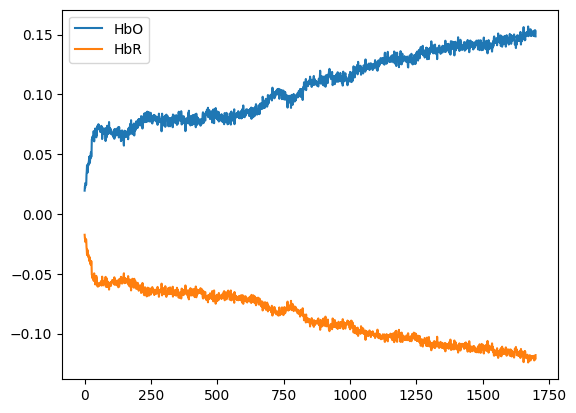